In [1]:
using CSV, StatPlots, Plots; pyplot();
data = CSV.read("/Users/kevinliu/Documents/machine-learning-ex2/ex2/ex2data1.txt", datarow=1);

In [2]:
X = hcat(ones(100,1), Matrix(data[:, [1,2]]))

100×3 Array{Union{Float64, Missings.Missing},2}:
 1.0  34.6237  78.0247
 1.0  30.2867  43.895 
 1.0  35.8474  72.9022
 1.0  60.1826  86.3086
 1.0  79.0327  75.3444
 1.0  45.0833  56.3164
 1.0  61.1067  96.5114
 1.0  75.0247  46.554 
 1.0  76.0988  87.4206
 1.0  84.4328  43.5334
 1.0  95.8616  38.2253
 1.0  75.0137  30.6033
 1.0  82.3071  76.482 
 ⋮                    
 1.0  78.6354  96.6474
 1.0  52.348   60.7695
 1.0  94.0943  77.1591
 1.0  90.4486  87.5088
 1.0  55.4822  35.5707
 1.0  74.4927  84.8451
 1.0  89.8458  45.3583
 1.0  83.4892  48.3803
 1.0  42.2617  87.1039
 1.0  99.315   68.7754
 1.0  55.34    64.9319
 1.0  74.7759  89.5298

In [3]:
y = Vector(data[:, 3])

100-element Array{Union{Int64, Missings.Missing},1}:
 0
 0
 0
 1
 1
 0
 1
 1
 1
 1
 0
 0
 1
 ⋮
 1
 0
 1
 1
 0
 1
 1
 1
 1
 1
 1
 1

In [4]:
function mapfeature(x1, x2)
    degree = 6 # why 6?
    out = ones(size(x1[:,1]))
    for i = 1:degree
        for j = 0:i
            out[:, end + 1] = [x1 .^ [i - j]] .* [x2 .^ j]
        end
    end
end

mapfeature (generic function with 1 method)

In [5]:
function plotdboundary(θ, X, y)
    if size(X, 2) <= 3
        # two endpoints
        plot_xaxis = [minimum(X[:,2])-2,  maximum(X[:,2])+2]
        # compute decision boundary line
        plot_yaxis = (-1 ./ θ[3]) .* (θ[2] .* plot_xaxis + θ[1])
        plot(plot_xaxis, plot_yaxis, label="decision boundary")
    else
        # grid range
        u = linspace(-1, 1.5, 50)
        v = linspace(-1, 1.5, 50)
        z = zeros(length(u), length(v));
        # Evaluate z = θ * x over the grid
        for i = 1:length(u)
            for j = 1:length(v)
                z[i,j] = mapfeature(u[i], v[j]) * θ
            end
        end
        # transpose z before calling contour
        z = z'
        # Plot z = 0, specify the range [0, 0]
        # Contour should maximize inter-class distance
        contour(u, v, z, [0, 0], lineWidth=2)
    end
end

plotdboundary (generic function with 1 method)

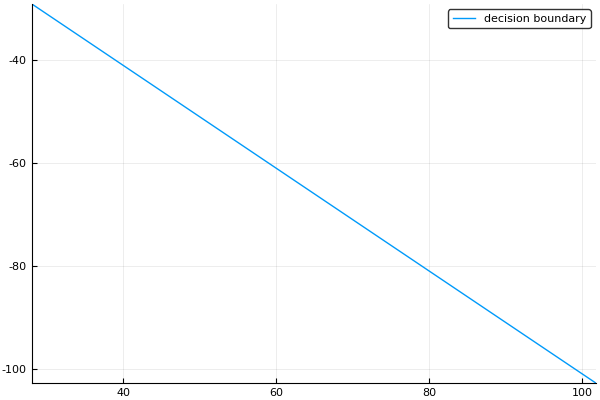

In [6]:
plotdboundary([0.203,0.203,0.203], X, y)

In [7]:
u = linspace(-1, 1.5, 50)
v = linspace(-1, 1.5, 50)
z = zeros(50, 50);

In [8]:
z[1,1] = mapfeature(u[1], v[1]) * [0.203,0.203,0.203]

LoadError: [91mMethodError: no method matching getindex(::Float64, ::Colon, ::Int64)[39m